In [1]:
from fastai.vision.all import *
import fastai
import timm
import torch

In [ ]:
torch.cuda.set_device(2)

In [2]:
df = pd.read_csv('../trainValid.csv')

In [3]:
df

,Unnamed: 0,nombre_foto,grado de DMAE,binary,set
0,61504,anonymized_231059.jpg,normal,0,training
1,176989,anonymized_442122.jpg,normal,0,training
2,133399,anonymized_363034.jpg,normal,0,training
3,220150,anonymized_519072.jpg,normal,0,training
4,155853,anonymized_403989.jpg,normal,0,training
...,...,...,...,...,...
7797,224854,anonymized_528388.jpg,tardia,1,validation
7798,225492,anonymized_529721.jpg,intermedia,1,validation
7799,226322,anonymized_531350.jpg,precoz,1,validation
7800,227489,anonymized_533460.jpg,tardia,1,validation


In [4]:
def is_valid(path):
    name = path[1]
    return (df[df['nombre_foto']==name])['set'].values[0]=='validation'

# 224

In [5]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=5),
    SaveModelCallback(fname='resnetrs224',monitor='f1_score'),
    #ReduceLROnPlateau(patience=2)
]

In [6]:
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 splitter=FuncSplitter(is_valid),
                 get_x = ColReader(1,pref="../amd/"),
                 get_y=ColReader(3),
                 item_tfms = [Resize(384)], # CropPad(200,200)
                 batch_tfms=[*aug_transforms(size=224, min_scale=0.75,do_flip=True,flip_vert=True,
                      max_rotate=2.,max_zoom=1.1, max_warp=0.05,p_affine=0.9, p_lighting=0.8), 
                             Normalize.from_stats(*imagenet_stats)])

In [7]:
dls = db.dataloaders(df.values,bs=128,num_workers=0)

In [8]:
learn = Learner(dls,timm.create_model('resnetrs50',num_classes=2,pretrained=True,drop_rate=0.5),
                metrics=[accuracy,Precision(),Recall(),F1Score(),RocAucBinary()],
                cbs=callbacks,
                loss_func= FocalLossFlat()).to_fp16()

In [9]:
#learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.101906,0.115896,0.879487,0.913408,0.838462,0.874332,0.947002,01:13


Better model found at epoch 0 with f1_score value: 0.8743315508021391.


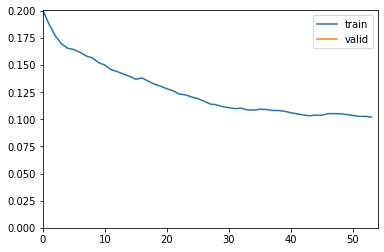

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.074802,0.072733,0.885897,0.941349,0.823077,0.878249,0.963498,01:09
1,0.068322,0.064578,0.905128,0.941341,0.864103,0.901070,0.966729,01:10
2,0.061443,0.076336,0.900000,0.926230,0.869231,0.896825,0.961762,01:11
3,0.058018,0.071820,0.906410,0.927224,0.882051,0.904074,0.961154,01:10
4,0.053636,0.093101,0.888462,0.939130,0.830769,0.881633,0.959773,01:11
5,0.050348,0.073120,0.911538,0.930295,0.889744,0.909567,0.963202,01:10
6,0.050071,0.090181,0.901282,0.875300,0.935897,0.904585,0.964316,01:10


Better model found at epoch 0 with f1_score value: 0.8782489740082079.


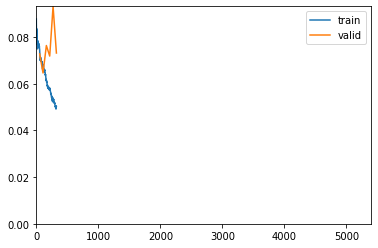

Better model found at epoch 1 with f1_score value: 0.9010695187165777.
Better model found at epoch 3 with f1_score value: 0.9040735873850196.
Better model found at epoch 5 with f1_score value: 0.90956749672346.
No improvement since epoch 1: early stopping


In [10]:
learn.fine_tune(100,base_lr=3e-3)

In [11]:
dfTest = pd.read_csv('../testSample.csv')

In [12]:
def is_test(path):
    name = path[1]
    return (dfTest[dfTest['nombre_foto']==name])['set'].values[0]=='test'

In [13]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 splitter=FuncSplitter(is_test),
                 get_x = ColReader(1,pref="../amd/"),
                 get_y=ColReader(3),
                 item_tfms = [Resize(384)], # CropPad(200,200)
                 batch_tfms=[*aug_transforms(size=224, min_scale=0.75,do_flip=True,flip_vert=True,
                      max_rotate=2.,max_zoom=1.1, max_warp=0.05,p_affine=0.9, p_lighting=0.8), 
                             Normalize.from_stats(*imagenet_stats)])

In [14]:
dlsTest = dbTest.dataloaders(dfTest.values,bs=128,num_workers=0)

In [15]:
learn.dls = dlsTest

In [16]:
learn.validate()

Better model found at epoch 0 with f1_score value: 0.9631258382642998.


(#6) [0.07377643883228302,0.9005128145217896,0.9239956568946797,0.8728205128205129,0.8976793248945147,0.9631258382642998]

# 384

In [5]:
import torch
torch.cuda.set_device(3)
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=10),
    SaveModelCallback(fname='resnetrs384',monitor='f1_score'),
    #ReduceLROnPlateau(patience=2)
]

In [6]:
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 splitter=FuncSplitter(is_valid),
                 get_x = ColReader(1,pref="../amd/"),
                 get_y=ColReader(3),
                 item_tfms = [Resize(512)], # CropPad(200,200)
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75,do_flip=True,flip_vert=True,
                      max_rotate=2.,max_zoom=1.1, max_warp=0.05,p_affine=0.9, p_lighting=0.8), 
                             Normalize.from_stats(*imagenet_stats)])

In [7]:
dls = db.dataloaders(df.values,bs=32,num_workers=0)

In [8]:
learn = Learner(dls,timm.create_model('resnetrs50',num_classes=2,pretrained=True,drop_rate=0.5),
                metrics=[accuracy,Precision(),Recall(),F1Score(),RocAucBinary()],
                cbs=callbacks,
                loss_func= FocalLossFlat()).to_fp16()

In [9]:
learn.load('resnetrs224')

/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


SuggestedLRs(valley=6.30957365501672e-05)

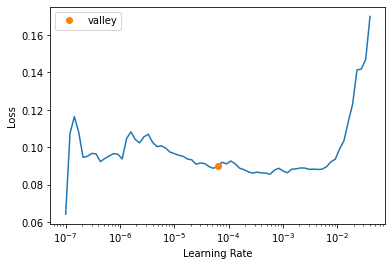

In [10]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.139660,0.161165,0.678205,0.931677,0.384615,0.544465,0.830759,01:52


Better model found at epoch 0 with f1_score value: 0.544464609800363.


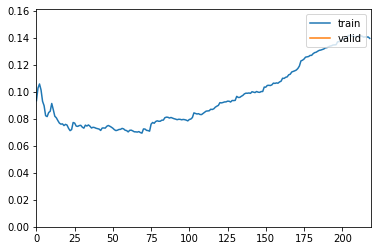

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.098049,0.096305,0.858974,0.951613,0.756410,0.842857,0.943406,01:49
1,0.090062,0.079051,0.879487,0.945783,0.805128,0.869806,0.952890,01:48
2,0.075953,0.069770,0.892308,0.922652,0.856410,0.888298,0.958514,01:48
3,0.077804,0.071945,0.880769,0.898123,0.858974,0.878113,0.955884,01:48
4,0.078118,0.074196,0.885897,0.873449,0.902564,0.887768,0.953849,01:49
5,0.068638,0.070875,0.893590,0.932394,0.848718,0.888591,0.959497,01:49
6,0.075182,0.068550,0.884615,0.936047,0.825641,0.877384,0.965454,01:48
7,0.072260,0.072139,0.893590,0.915989,0.866667,0.890646,0.957281,01:48
8,0.063858,0.071204,0.902564,0.948571,0.851282,0.897297,0.962226,01:49
9,0.074151,0.068095,0.888462,0.944282,0.825641,0.880985,0.964533,01:49


Better model found at epoch 0 with f1_score value: 0.8428571428571429.


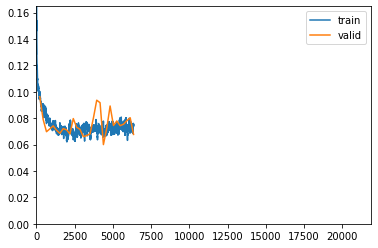

Better model found at epoch 1 with f1_score value: 0.8698060941828255.
Better model found at epoch 2 with f1_score value: 0.8882978723404255.
Better model found at epoch 5 with f1_score value: 0.8885906040268456.
Better model found at epoch 7 with f1_score value: 0.8906455862977603.
Better model found at epoch 8 with f1_score value: 0.8972972972972973.
Better model found at epoch 13 with f1_score value: 0.9086092715231788.
Better model found at epoch 19 with f1_score value: 0.9105058365758755.
No improvement since epoch 19: early stopping


In [10]:
learn.fine_tune(100,base_lr=3e-3)

In [11]:
dfTest = pd.read_csv('../testSample.csv')

In [18]:
def is_test(path):
    name = path[1]
    return (dfTest[dfTest['nombre_foto']==name])['set'].values[0]=='test'

In [19]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 splitter=FuncSplitter(is_test),
                 get_x = ColReader(1,pref="../amd/"),
                 get_y=ColReader(3),
                 item_tfms = [Resize(512)], # CropPad(200,200)
                 batch_tfms=[*aug_transforms(size=384, min_scale=0.75,do_flip=True,flip_vert=True,
                      max_rotate=2.,max_zoom=1.1, max_warp=0.05,p_affine=0.9, p_lighting=0.8), 
                             Normalize.from_stats(*imagenet_stats)])

In [20]:
dlsTest = dbTest.dataloaders(dfTest.values,bs=64,num_workers=0)

In [21]:
learn.dls = dlsTest

In [16]:
learn.validate()

Better model found at epoch 0 with f1_score value: 0.9545072978303748.


(#6) [0.07982497662305832,0.8964102268218994,0.9064143007360673,0.884102564102564,0.8951194184839044,0.9545072978303748]

In [17]:
dfTest = pd.read_csv('../test.csv')

In [22]:
learn.validate()

Better model found at epoch 0 with f1_score value: 0.9584182476716109.


(#6) [0.0762489065527916,0.910301685333252,0.17820963407070498,0.884102564102564,0.29662766689607706,0.9584182476716109]

# 512

In [5]:
import torch
torch.cuda.set_device(1)
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=5),
    SaveModelCallback(fname='resnetrs512',monitor='f1_score'),
    #ReduceLROnPlateau(patience=2)
]

In [6]:
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 splitter=FuncSplitter(is_valid),
                 get_x = ColReader(1,pref="../amd/"),
                 get_y=ColReader(3),
                 item_tfms = [Resize(640)], # CropPad(200,200)
                 batch_tfms=[*aug_transforms(size=512, min_scale=0.75,do_flip=True,flip_vert=True,
                      max_rotate=2.,max_zoom=1.1, max_warp=0.05,p_affine=0.9, p_lighting=0.8), 
                             Normalize.from_stats(*imagenet_stats)])

In [7]:
dls = db.dataloaders(df.values,bs=8,num_workers=0)

In [8]:
learn = Learner(dls,timm.create_model('resnetrs50',num_classes=2,pretrained=True,drop_rate=0.5),
                metrics=[accuracy,Precision(),Recall(),F1Score(),RocAucBinary()],
                cbs=callbacks,
                loss_func= FocalLossFlat()).to_fp16()

In [9]:
learn.load('resnetrs384')

/home/jonathan/.virtualenvs/segmentation/lib/python3.6/site-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


SuggestedLRs(valley=0.00013182566908653826)

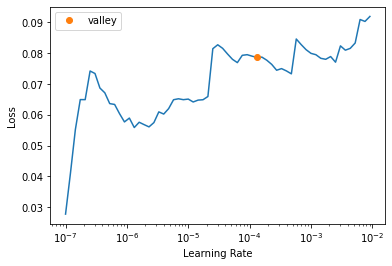

In [10]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.086929,0.070947,0.883333,0.938416,0.820513,0.875513,0.960736,03:52


Better model found at epoch 0 with f1_score value: 0.8755129958960328.


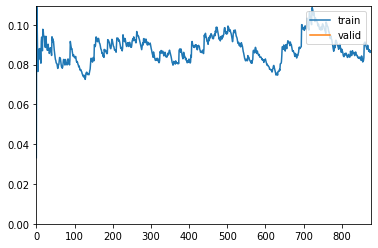

epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.085658,0.070940,0.888462,0.939130,0.830769,0.881633,0.960664,03:53
1,0.087159,0.068849,0.887179,0.933908,0.833333,0.880759,0.961966,03:53
2,0.088839,0.067670,0.900000,0.926230,0.869231,0.896825,0.961492,03:53
3,0.090075,0.067001,0.901282,0.919571,0.879487,0.899083,0.962130,03:53
4,0.073644,0.067760,0.900000,0.938202,0.856410,0.895442,0.962620,03:53
5,0.078974,0.066747,0.900000,0.919355,0.876923,0.897638,0.962410,03:55
6,0.090215,0.067426,0.898718,0.923706,0.869231,0.895641,0.962383,03:55
7,0.080297,0.067715,0.903846,0.941176,0.861538,0.899598,0.962761,03:56
8,0.084159,0.065479,0.900000,0.912698,0.884615,0.898438,0.963991,03:56
9,0.085471,0.067032,0.896154,0.925620,0.861538,0.892430,0.962413,03:56


Better model found at epoch 0 with f1_score value: 0.8816326530612245.


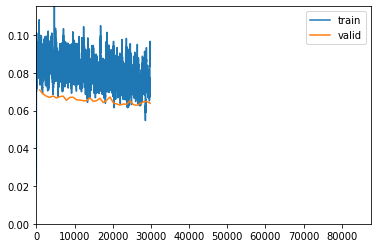

Better model found at epoch 2 with f1_score value: 0.8968253968253969.
Better model found at epoch 3 with f1_score value: 0.8990825688073394.
Better model found at epoch 7 with f1_score value: 0.8995983935742972.
Better model found at epoch 16 with f1_score value: 0.899736147757256.
Better model found at epoch 20 with f1_score value: 0.9025367156208277.
Better model found at epoch 22 with f1_score value: 0.9067017082785809.
No improvement since epoch 29: early stopping


In [11]:
learn.fine_tune(100,base_lr=3e-6)

In [12]:
dfTest = pd.read_csv('../testSample.csv')

In [13]:
def is_test(path):
    name = path[1]
    return (dfTest[dfTest['nombre_foto']==name])['set'].values[0]=='test'

In [14]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 splitter=FuncSplitter(is_test),
                 get_x = ColReader(1,pref="../amd/"),
                 get_y=ColReader(3),
                 item_tfms = [Resize(640)], # CropPad(200,200)
                 batch_tfms=[*aug_transforms(size=512, min_scale=0.75,do_flip=True,flip_vert=True,
                      max_rotate=2.,max_zoom=1.1, max_warp=0.05,p_affine=0.9, p_lighting=0.8), 
                             Normalize.from_stats(*imagenet_stats)])

In [15]:
dlsTest = dbTest.dataloaders(dfTest.values,bs=8,num_workers=0)

In [16]:
learn.dls = dlsTest

In [17]:
learn.validate()

Better model found at epoch 0 with f1_score value: 0.9564749506903353.


(#6) [0.0725322812795639,0.8928205370903015,0.9065817409766455,0.8758974358974358,0.8909754825247783,0.9564749506903353]

In [19]:
preds,y=learn.tta()

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [21]:
import numpy as np

In [22]:
np.argmax(preds,axis=1)

tensor([0, 0, 0,  ..., 1, 1, 0])

In [23]:
f1_score(np.argmax(preds,axis=1),y)

0.9001040582726326

In [24]:
precision_score(np.argmax(preds,axis=1),y)

0.8871794871794871

In [25]:
recall_score(np.argmax(preds,axis=1),y)

0.9134107708553326